

# Project: Medical Appointment No-Shows Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset object of this investigation is a series of appointments records at the Brazilian Unified Health System (SUS). The SUS is a free and public healthcare system based in equality and universal access for the people of Brazil. In 2019 17.3 millions of brazilians looked for some primary attetion service at the SUS in the last six months before particiapation in the [PNS-2019 assessment](https://agenciadenoticias.ibge.gov.br/agencia-sala-de-imprensa/2013-agencia-de-noticias/releases/29203-pns-2019-quem-mais-utiliza-o-sus-avaliou-mais-positivamente-a-qualidade-dos-servicos-de-atencao-primaria-a-saude). (source:Ibge) 

The SUS system is characterized by the tranditional limitation of public systems, the high demands rates, high no-show rates and long wating time for appoinments. 

The primary posed question for this dataset is what factors or features of an appoiment can drive to a no-show event. Is there any correlation between, gender, age or schedule/appoinment caracteristcs (day of the week, time of the day,  month, season, timespan,. etc..)  that are important for a no-show event?




Dataset description: 

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
>‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
>Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


**Delete me !!!**
> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [2]:
# Importing pandas for data manipulation
# Importing matplolib ans seaborn for data visualization 
# Import numpy for numerical operations

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sbn
import numpy as np

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
# Looking at dataset head for data import verification 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Missing values and data types 
*using info for missing data and data types verification*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


***using describe for visualizing statistics and ranges***

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
## Numeber of unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


### Data Cleaning:

**Findings:**

1. General:
    - Dataset with 110527 rows and 14 columns with types:float64(1), int64(8), object(5)
    - Upper and lower caps mixed in column names
    - No missing values found
    - "-" charcter at column name
1. Column PatientId - type float64. It makes more sense to have this as strings. 
1. Column AppoitentID - type int64. It makes more sense to have this as strings
1. Colunn SchedulleDay and AppointmentDay make sense for analisys in datetime format.
1. There are multiple appoimments for the same patient identification, not really a problem, but require attention not to bias the analisys
1. Need fix Age of value or values == -1 

    

***Fixing column names seting lower and removing special chars***

In [8]:
columns = df.columns
columns = columns.str.lower()
columns = columns.str.replace('-','')
columns = columns.str.replace('_','')
df.columns = columns


***Checking fix.***

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hipertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handcap         110527 non-null  int64  
 12  smsreceived     110527 non-null  int64  
 13  noshow          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


***Changing:***
- *patientid and appointimentid types to string.* 

- *scheduleday and appoinmentday to datetime*


In [10]:
df.patientid = df.patientid.astype(int).astype(str)
df.appointmentid = df.appointmentid.astype(str)
df.scheduledday = pd.to_datetime(df.scheduledday)
df.appointmentday = pd.to_datetime(df.appointmentday)
#verifing
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [11]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
# Checking unique lists for mistakes, typos, etc. 
print(sorted(df.neighbourhood.unique()))
print(sorted(df.handcap.unique()))

['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC', 'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ', 'REDENÇÃO', 'REPÚBLICA', 'RESISTÊNCIA', 'ROMÃO', 'SANTA CECÍLIA', 'SANTA CLARA', 'SANTA HELENA', 'SANTA

In [13]:
# Checking Age column for typo error

print('Age min value:{} , Age Max value:{}'.format(df.age.min(),df.age.max()))


Age min value:-1 , Age Max value:115


In [14]:

df.drop(df[df.age == -1].index, axis=0,inplace=True)

#confirm drop outlier

print('Age min value:{} , Age Max value:{}'.format(df.age.min(),df.age.max()))


Age min value:0 , Age Max value:115


***One possible influece to noshow is the time between scheduled and the appoinment day.***

- ***Creating the column timespan column as difference in days between appointmentday and scheduledday colouns.***
- ***Creating the column appdayofweek column as day of the week of appointmentday colouns.***
- ***Creating the column schddayofweek column day of the week of scheduledday colouns.***

In [86]:
df['timespan']= df['appointmentday'].dt.date - df['scheduledday'].dt.date
df['appdayofweek'] = df['appointmentday'].dt.dayofweek
df['schddayofweek'] = df['scheduledday'].dt.dayofweek

In [87]:
df.head(50)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,timespan,appdayofweek,schddayofweek
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days,4,4
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days,4,4
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days,4,4
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days,4,4
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days,4,4
5,95985133231274,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,2 days,4,2
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2 days,4,2
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2 days,4,2
8,56394729949972,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,0 days,4,4
9,78124564369297,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,2 days,4,2


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



In [17]:
## masking

noshow = df.noshow == 'Yes'
show  = df.noshow == 'No'


### Research Question 1 :   *Is there a prefered gender for appointment no-show?*

First check the unviverse of appointments in respect to gender

In [68]:
total = df.gender.value_counts()
total.sum()

110526

In [29]:
noshow_gender = df[noshow].gender.value_counts()

In [30]:
show_gender = df[show].gender.value_counts()

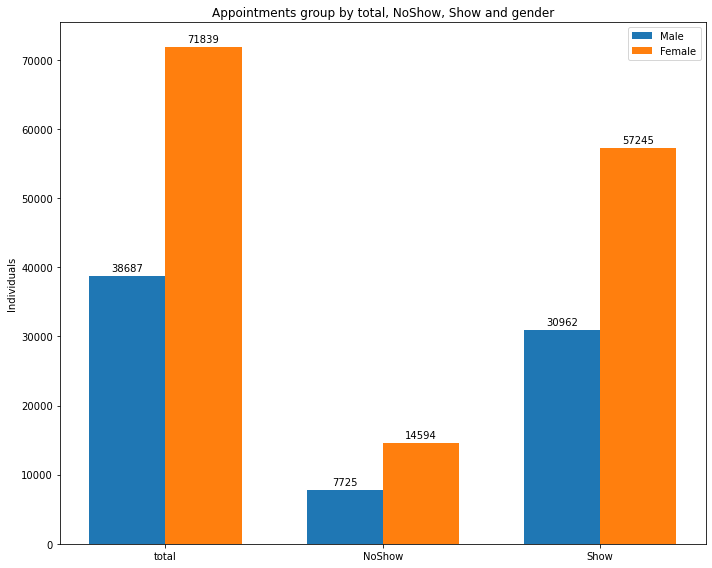

In [66]:
# Supported by MatplotLib documnetation: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

female_hights = [total[0], noshow_gender[0], show_gender[0]]
male_hights = [total[1], noshow_gender[1], show_gender[1]]

labels = ['total', 'NoShow', 'Show']

x = np.arange(len(labels))  

width = 0.35  

fig, ax = plt.subplots(figsize=(10,8))

bars1 = ax.bar(x - width/2, male_hights, width, label='Male')
bars2 = ax.bar(x + width/2, female_hights, width, label='Female')

ax.set_ylabel('Individuals')
ax.set_title('Appointments group by total, NoShow, Show and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


fig.tight_layout()

plt.show()

**Checking if the same gender ratio preserves for the total, NoShow and Show.**

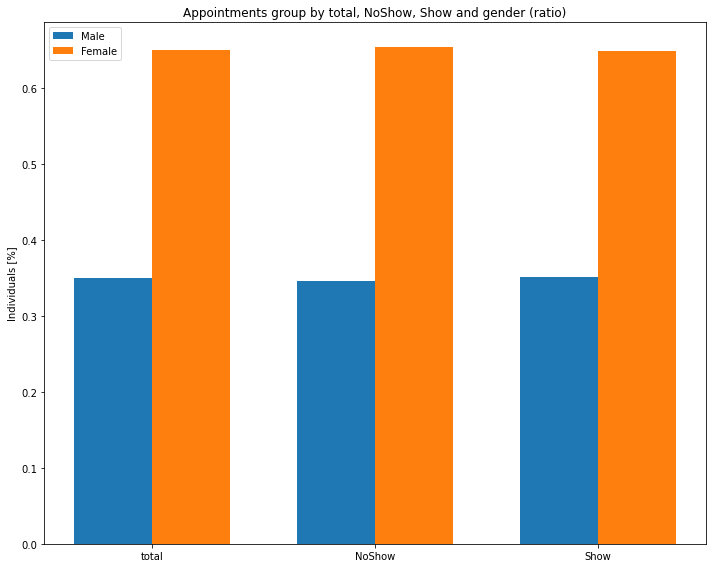

In [79]:
# Supported by MatplotLib documnetation: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

female_hights = [total[0]/total.sum(), noshow_gender[0]/noshow_gender.sum(), show_gender[0]/show_gender.sum()]
male_hights = [total[1]/total.sum(), noshow_gender[1]/noshow_gender.sum(), show_gender[1]/show_gender.sum()]

labels = ['total', 'NoShow', 'Show']
x = np.arange(len(labels))  

width = 0.35  

fig, ax = plt.subplots(figsize=(10,8))

bars1 = ax.bar(x - width/2, male_hights, width, label='Male')
bars2 = ax.bar(x + width/2, female_hights, width, label='Female')

ax.set_ylabel('Individuals [%]')
ax.set_title('Appointments group by total, NoShow, Show and gender (ratio)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


fig.tight_layout()

plt.show()

In [81]:
print('NoShow Female ratio:',noshow_gender[0]/noshow_gender.sum())
print('NoShow Male ratio:',noshow_gender[1]/noshow_gender.sum())
print('Show Female ratio:',show_gender[0]/show_gender.sum())
print('Show Male ratio:',show_gender[1]/show_gender.sum())


NoShow Female ratio: 0.653882342398853
NoShow Male ratio: 0.346117657601147
Show Female ratio: 0.6489847744510073
Show Male ratio: 0.3510152255489927


### Research Question 2: Is there any relation between the timespan between schedule and appointtment day and no-show.

In [114]:
noshow_mean = df[noshow].timespan.mean()/np.timedelta64(1, 'D')
show_mean = df[show].timespan.mean()/np.timedelta64(1, 'D')
full_mean = df.timespan.mean()/np.timedelta64(1, 'D')


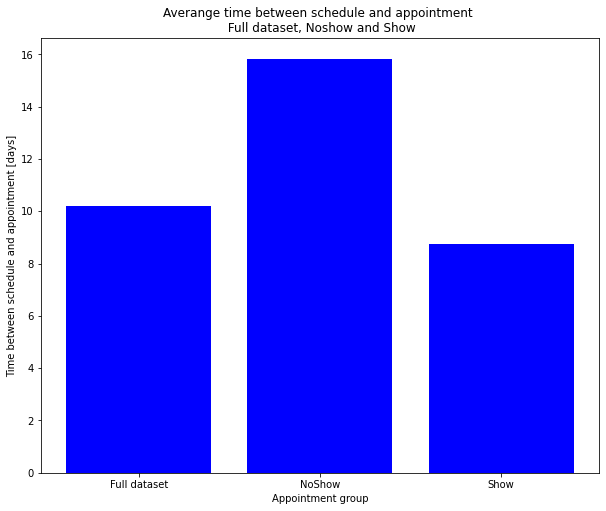

In [130]:
# create a dataset
height = [full_mean,noshow_mean,show_mean]

bars = ('Full dataset', 'NoShow', 'Show')

x_pos = np.arange(len(bars))

plt.figure(figsize=(10,8))

plt.bar(x_pos, height, color='b')

plt.xticks(x_pos, bars)

plt.title('Averange time between schedule and appointment \n Full dataset, Noshow and Show')

plt.xlabel('Appointment group')

plt.ylabel('Time between schedule and appointment [days]')

plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

References:
    
[1]    https://agenciadenoticias.ibge.gov.br/agencia-sala-de-imprensa/2013-agencia-de-noticias/releases/29203-pns-2019-quem-mais-utiliza-o-sus-avaliou-mais-positivamente-a-qualidade-dos-servicos-de-atencao-primaria-a-saude
    